In [2]:
# Preprocessing phase.
import pandas as pd
data = pd.read_csv("titanic-passengers.csv",sep =";")
# Head of the Dataset
data.head(2)
#Titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.00,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.65,F G73,S


In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.Age.fillna(data.Age.mean(), inplace = True )

In [7]:
data.drop(["Cabin","PassengerId","Name","Ticket","SibSp","Parch"],axis = 1 ,inplace = True)
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,No,2,male,28.0,13.0000,S
1,No,3,male,25.0,7.6500,S
2,No,3,male,20.0,7.8542,S
3,No,3,female,29.0,21.0750,S
4,No,1,male,31.0,52.0000,S


In [9]:
data.Embarked.fillna("S", inplace =True)

In [10]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data.Survived =encoder.fit_transform(data.Survived)
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,2,male,28.0,13.0000,S
1,0,3,male,25.0,7.6500,S
2,0,3,male,20.0,7.8542,S
3,0,3,female,29.0,21.0750,S
4,0,1,male,31.0,52.0000,S


In [12]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int32  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    object 
dtypes: float64(2), int32(1), int64(1), object(2)
memory usage: 38.4+ KB


In [14]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#features extraction
x = data[['Fare', 'Age']]
y = data['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.67


<AxesSubplot:xlabel='Fare', ylabel='Survived'>

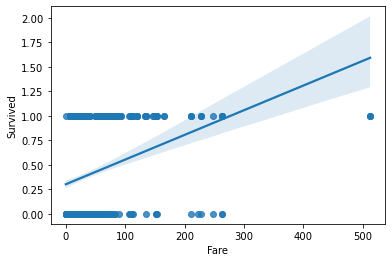

In [17]:
import seaborn as sns
sns.regplot(x='Fare',y='Survived',data=data)

<AxesSubplot:xlabel='Age', ylabel='Survived'>

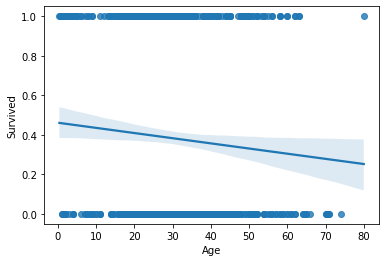

In [18]:
sns.regplot(x='Age',y='Survived',data=data)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

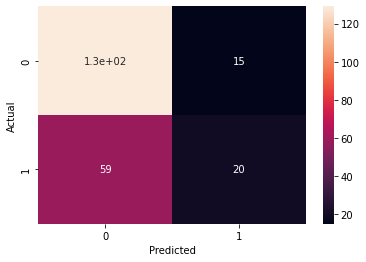

In [19]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78       144
           1       0.57      0.25      0.35        79

    accuracy                           0.67       223
   macro avg       0.63      0.57      0.56       223
weighted avg       0.65      0.67      0.63       223

